#📌 Extracción

In [142]:
import pandas as pd

try:
    datos = pd.read_json('https://raw.githubusercontent.com/Fernando-Falla/Challenge_TelecomX_Parte1/refs/heads/main/TelecomX_Data.json')
    display(datos.head())
except FileNotFoundError:
    print("The file was not downloaded correctly. Please check the GitHub URL.")

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [143]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [144]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [145]:
# normalizamos la columna 'customer'
customer_normalized = pd.json_normalize(datos['customer'], sep='_')
display(customer_normalized.head())


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [146]:
# normalizamos la columna 'phone'
phone_normalized = pd.json_normalize(datos['phone'], sep='_')
display(phone_normalized.head())

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [147]:
# normalizamos la columna 'internet'
internet_normalized = pd.json_normalize(datos['internet'], sep='_')
display(internet_normalized.head())

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [148]:
# normalizamos la columna 'account'
account_normalized = pd.json_normalize(datos['account'], sep='_')
display(account_normalized.head())

,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [149]:
# Combinar los DFrames normalizados con el DFrame original
datos_normalized = pd.concat([datos[['customerID', 'Churn']],
                              customer_normalized,
                              phone_normalized,
                              internet_normalized,
                              account_normalized], axis=1)

display(datos_normalized.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [150]:
# Contar los valores faltantes en la columna 'Churn'
missing_churn_count = datos_normalized['Churn'].isnull().sum()
print(f"Número de valores faltantes en la columna 'Churn': {missing_churn_count}")

Número de valores faltantes en la columna 'Churn': 0


In [151]:
#Vamos a reemplazar las cadenas vacías en la columna 'Churn' por el valor 'No'.
import numpy as np

datos_normalized['Churn'] = datos_normalized['Churn'].replace('', 'No')

# Verificar los valores únicos en la columna 'Churn' después del reemplazo
print("Valores únicos en la columna 'Churn' después de manejar las cadenas vacías:")
print(datos_normalized['Churn'].unique())

Valores únicos en la columna 'Churn' después de manejar las cadenas vacías:
['No' 'Yes']


In [152]:
# Verificar valores ausentes
print("Valores ausentes por columna:")
print(datos_normalized.isnull().sum())

# Verificar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(datos_normalized.duplicated().sum())

# Verificar inconsistencias en columnas categóricas (ejemplo con algunas columnas)
# Se podrían agregar más columnas categóricas a esta lista según sea necesario
categorical_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

print("\nValores únicos en columnas categóricas:")
for col in categorical_cols:
    if col in datos_normalized.columns:
        print(f"- {col}: {datos_normalized[col].unique()}")
    else:
        print(f"- Columna '{col}' no encontrada en el DataFrame.")

# Nota: Para errores de formato en columnas numéricas como 'Charges_Total' y 'Charges_Monthly',
# se verificarán más adelante durante la conversión de tipos de datos si es necesario.

Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64

Número de filas duplicadas:
0

Valores únicos en columnas categóricas:
- Churn: ['No' 'Yes']
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['Yes' 'No' 'No internet

In [153]:
# Vamos a convertir las columnas a los tipos de datos apropiados.
# Crear una copia del DataFrame para evitar SettingWithCopyWarning
datos_cleaned = datos_normalized.copy()

# Convertir columnas de cargos a numéricas, manejando posibles errores
datos_cleaned['Charges_Monthly'] = pd.to_numeric(datos_cleaned['Charges_Monthly'], errors='coerce')
datos_cleaned['Charges_Total'] = pd.to_numeric(datos_cleaned['Charges_Total'], errors='coerce')

# Verificar si hay valores NaN introducidos por la conversión
print("Valores NaN después de la conversión de columnas de cargos:")
print(datos_cleaned[['Charges_Monthly', 'Charges_Total']].isnull().sum())

# Convertir columnas categóricas a tipo 'category'
categorical_cols = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    if col in datos_cleaned.columns:
        datos_cleaned[col] = datos_cleaned[col].astype('category')

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(datos_cleaned.dtypes)

Valores NaN después de la conversión de columnas de cargos:
Charges_Monthly     0
Charges_Total      11
dtype: int64

Tipos de datos después de la conversión:
customerID            object
Churn               category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Charges_Monthly      float64
Charges_Total        float64
dtype: object


In [154]:
datos_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   category
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [155]:
# Aplicamos one-hot encoding a las columnas categóricas 'InternetService', '
#Contract' y 'PaymentMethod' para convertirlas en columnas numéricas
# Aplicar one-hot encoding a las columnas especificadas
datos_encoded = pd.get_dummies(datos_cleaned, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

# Mostrar las primeras filas del DataFrame con las nuevas columnas dummy
display(datos_encoded.head())

# Verificar las nuevas columnas y sus tipos de datos
print("\nColumnas después del one-hot encoding:")
print(datos_encoded.columns)
print("\nTipos de datos después del one-hot encoding:")
print(datos_encoded.dtypes)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,No,...,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,No,...,0,1,0,1,0,0,0,0,1,0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,No,...,0,1,0,1,0,0,0,0,1,0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1



Columnas después del one-hot encoding:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges_Monthly',
       'Charges_Total', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Tipos de datos después del one-hot encoding:
customerID                                   object
Churn                                      category
gender                                     category
SeniorCitizen                              category
Partner                                    categor

In [156]:
# convertiremos las columnas booleanas a tipo entero (1 para True, 0 para False).
# Primero, identificaremos las columnas booleanas.
# Identificar columnas booleanas
boolean_cols = datos_encoded.select_dtypes(include='bool').columns

# Convertir columnas booleanas a entero (1/0)
for col in boolean_cols:
    datos_encoded[col] = datos_encoded[col].astype(int)

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos después de convertir booleanos a enteros:")
print(datos_encoded.dtypes)


Tipos de datos después de convertir booleanos a enteros:
customerID                                   object
Churn                                      category
gender                                     category
SeniorCitizen                              category
Partner                                    category
Dependents                                 category
tenure                                        int64
PhoneService                               category
MultipleLines                              category
OnlineSecurity                             category
OnlineBackup                               category
DeviceProtection                           category
TechSupport                                category
StreamingTV                                category
StreamingMovies                            category
PaperlessBilling                           category
Charges_Monthly                             float64
Charges_Total                               float64
Intern

In [157]:
datos_encoded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,No,...,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,No,...,0,1,0,1,0,0,0,0,1,0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,No,...,0,1,0,1,0,0,0,0,1,0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1


In [158]:
# Se eliminan las columnas con datos no significativos.
datos_encoded = datos_encoded.drop(['customerID', 'InternetService_No'], axis = 1)
datos_encoded.columns.tolist()

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [159]:
# cambiar los nombres de las columnas, al español
#para que el estudio sea más entendible

col_equivalencias = {
    'Churn': 'Abandono',
    'gender': 'Género',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'PermanenciaMeses',
    'PhoneService': 'ServicioTeléfono',
    'MultipleLines': 'LíneasMúltiples',
    'OnlineSecurity': 'SeguridadEnLínea',
    'OnlineBackup': 'RespaldoEnLínea',
    'DeviceProtection': 'ProtecciónDispositivo',
    'TechSupport': 'SoporteTécnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPelículas',
    'PaperlessBilling': 'FacturaciónElectrónica',
    'Charges_Monthly': 'CargoMensual',
    'Charges_Total': 'CargoTotal',
    'InternetService_DSL': 'Internet_DSL',
    'InternetService_Fiber optic': 'Internet_FibraÓptica',
    'Contract_Month-to-month': 'Contrato_Mensual',
    'Contract_One year': 'Contrato_1Año',
    'Contract_Two year': 'Contrato_2Años',
    'PaymentMethod_Bank transfer (automatic)': 'Pago_TransferenciaAutomática',
    'PaymentMethod_Credit card (automatic)': 'Pago_TarjetaAutomática',
    'PaymentMethod_Electronic check': 'Pago_ChequeElectrónico',
    'PaymentMethod_Mailed check': 'Pago_ChequeCorreo'
}
datos_encoded = datos_encoded.rename(columns=col_equivalencias)
datos_encoded.columns.tolist()

['Abandono',
 'Género',
 'AdultoMayor',
 'Pareja',
 'Dependientes',
 'PermanenciaMeses',
 'ServicioTeléfono',
 'LíneasMúltiples',
 'SeguridadEnLínea',
 'RespaldoEnLínea',
 'ProtecciónDispositivo',
 'SoporteTécnico',
 'StreamingTV',
 'StreamingPelículas',
 'FacturaciónElectrónica',
 'CargoMensual',
 'CargoTotal',
 'Internet_DSL',
 'Internet_FibraÓptica',
 'Contrato_Mensual',
 'Contrato_1Año',
 'Contrato_2Años',
 'Pago_TransferenciaAutomática',
 'Pago_TarjetaAutomática',
 'Pago_ChequeElectrónico',
 'Pago_ChequeCorreo']

In [160]:
datos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Abandono                      7267 non-null   category
 1   Género                        7267 non-null   category
 2   AdultoMayor                   7267 non-null   category
 3   Pareja                        7267 non-null   category
 4   Dependientes                  7267 non-null   category
 5   PermanenciaMeses              7267 non-null   int64   
 6   ServicioTeléfono              7267 non-null   category
 7   LíneasMúltiples               7267 non-null   category
 8   SeguridadEnLínea              7267 non-null   category
 9   RespaldoEnLínea               7267 non-null   category
 10  ProtecciónDispositivo         7267 non-null   category
 11  SoporteTécnico                7267 non-null   category
 12  StreamingTV                   7267 non-null   ca

In [161]:
datos_encoded.head()

,Abandono,Género,AdultoMayor,Pareja,Dependientes,PermanenciaMeses,ServicioTeléfono,LíneasMúltiples,SeguridadEnLínea,RespaldoEnLínea,...,CargoTotal,Internet_DSL,Internet_FibraÓptica,Contrato_Mensual,Contrato_1Año,Contrato_2Años,Pago_TransferenciaAutomática,Pago_TarjetaAutomática,Pago_ChequeElectrónico,Pago_ChequeCorreo
0,No,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,593.30,1,0,0,1,0,0,0,0,1
1,No,Male,0,No,No,9,Yes,Yes,No,No,...,542.40,1,0,1,0,0,0,0,0,1
2,Yes,Male,0,No,No,4,Yes,No,No,No,...,280.85,0,1,1,0,0,0,0,1,0
3,Yes,Male,1,Yes,No,13,Yes,No,No,Yes,...,1237.85,0,1,1,0,0,0,0,1,0
4,Yes,Female,1,Yes,No,3,Yes,No,No,No,...,267.40,0,1,1,0,0,0,0,0,1


In [162]:
# Manejar valores faltantes en 'CargoTotal'
# Imputaremos los valores faltantes con la mediana, una estrategia común para datos numéricos con posibles valores atípicos.
median_cargo_total = datos_encoded['CargoTotal'].median()

# Imputar valores faltantes asignando directamente
datos_encoded['CargoTotal'] = datos_encoded['CargoTotal'].fillna(median_cargo_total)

print("Valores NaN en 'CargoTotal' después de la imputación:")
print(datos_encoded['CargoTotal'].isnull().sum())

Valores NaN en 'CargoTotal' después de la imputación:
0


In [163]:
# Codificar las columnas categóricas restantes
# Mapearemos las columnas binarias a 0 y 1.

binary_cols = ['Género', 'AdultoMayor', 'Pareja', 'Dependientes', 'ServicioTeléfono', 'FacturaciónElectrónica']

for col in binary_cols:
    # Asumiendo que 'Female', 'No', 0 son 0 y 'Male', 'Yes', 1 son 1
    if col == 'Género':
        datos_encoded[col] = datos_encoded[col].map({'Female': 0, 'Male': 1})
    elif col == 'AdultoMayor':
         datos_encoded[col] = datos_encoded[col].map({0: 0, 1: 1})
    else:
        datos_encoded[col] = datos_encoded[col].map({'No': 0, 'Yes': 1})

# Para columnas con 'No service' o similar, mapeamos 'No' y 'No service' a 0 y 'Yes' a 1
service_cols = ['LíneasMúltiples', 'SeguridadEnLínea', 'RespaldoEnLínea', 'ProtecciónDispositivo', 'SoporteTécnico', 'StreamingTV', 'StreamingPelículas']

for col in service_cols:
    datos_encoded[col] = datos_encoded[col].map({'No': 0, 'No phone service': 0, 'No internet service': 0, 'Yes': 1})

# Mapear la columna objetivo 'Abandono'
datos_encoded['Abandono'] = datos_encoded['Abandono'].map({'No': 0, 'Yes': 1})

print("\nValores únicos en columnas categóricas después de la codificación:")
for col in binary_cols + service_cols + ['Abandono']:
     if col in datos_encoded.columns:
        print(f"- {col}: {datos_encoded[col].unique()}")


Valores únicos en columnas categóricas después de la codificación:
- Género: [0, 1]
Categories (2, int64): [0, 1]
- AdultoMayor: [0, 1]
Categories (2, int64): [0, 1]
- Pareja: [1, 0]
Categories (2, int64): [0, 1]
- Dependientes: [1, 0]
Categories (2, int64): [0, 1]
- ServicioTeléfono: [1, 0]
Categories (2, int64): [0, 1]
- FacturaciónElectrónica: [1, 0]
Categories (2, int64): [0, 1]
- LíneasMúltiples: [0 1]
- SeguridadEnLínea: [0 1]
- RespaldoEnLínea: [1 0]
- ProtecciónDispositivo: [0 1]
- SoporteTécnico: [1 0]
- StreamingTV: [1 0]
- StreamingPelículas: [0 1]
- Abandono: [0, 1]
Categories (2, int64): [0, 1]


In [164]:
# Crear la columna cargo diario
datos_encoded['CargoDiario'] = datos_encoded['CargoMensual'] / 30
#datos_encoded['CargoMensual'] = datos_encoded['CargoMensual'].round(2)
#datos_encoded['CargoDiario'] = datos_encoded['CargoDiario'].round(2)
datos_encoded.head()

,Abandono,Género,AdultoMayor,Pareja,Dependientes,PermanenciaMeses,ServicioTeléfono,LíneasMúltiples,SeguridadEnLínea,RespaldoEnLínea,...,Internet_DSL,Internet_FibraÓptica,Contrato_Mensual,Contrato_1Año,Contrato_2Años,Pago_TransferenciaAutomática,Pago_TarjetaAutomática,Pago_ChequeElectrónico,Pago_ChequeCorreo,CargoDiario
0,0,0,0,1,1,9,1,0,0,1,...,1,0,0,1,0,0,0,0,1,2.186667
1,0,1,0,0,0,9,1,1,0,0,...,1,0,1,0,0,0,0,0,1,1.996667
2,1,1,0,0,0,4,1,0,0,0,...,0,1,1,0,0,0,0,1,0,2.463333
3,1,1,1,1,0,13,1,0,0,1,...,0,1,1,0,0,0,0,1,0,3.266667
4,1,0,1,1,0,3,1,0,0,0,...,0,1,1,0,0,0,0,0,1,2.796667


In [165]:
# Normalizar columnas numéricas
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas para normalizar (excluyendo las columnas dummy y las binarias ya codificadas)
numeric_cols = ['PermanenciaMeses', 'CargoMensual', 'CargoTotal', 'CargoDiario']

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar StandardScaler a las columnas numéricas
datos_encoded[numeric_cols] = scaler.fit_transform(datos_encoded[numeric_cols])

print("\nPrimeras filas después de la normalización:")
display(datos_encoded.head())

print("\nEstadísticas descriptivas de las columnas numéricas después de la normalización:")
print(datos_encoded[numeric_cols].describe())


Primeras filas después de la normalización:


,Abandono,Género,AdultoMayor,Pareja,Dependientes,PermanenciaMeses,ServicioTeléfono,LíneasMúltiples,SeguridadEnLínea,RespaldoEnLínea,...,Internet_DSL,Internet_FibraÓptica,Contrato_Mensual,Contrato_1Año,Contrato_2Años,Pago_TransferenciaAutomática,Pago_TarjetaAutomática,Pago_ChequeElectrónico,Pago_ChequeCorreo,CargoDiario
0,0,0,0,1,1,-0.950200,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0.029206
1,0,1,0,0,0,-0.950200,1,1,0,0,...,1,0,1,0,0,0,0,0,1,-0.159990
2,1,1,0,0,0,-1.153700,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0.304702
3,1,1,1,1,0,-0.787401,1,0,0,1,...,0,1,1,0,0,0,0,1,0,1.104635
4,1,0,1,1,0,-1.194400,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0.636624



Estadísticas descriptivas de las columnas numéricas después de la normalización:
       PermanenciaMeses  CargoMensual    CargoTotal   CargoDiario
count      7.267000e+03  7.267000e+03  7.267000e+03  7.267000e+03
mean      -3.911065e-17  7.333247e-17  3.715512e-17  2.214641e-16
std        1.000069e+00  1.000069e+00  1.000069e+00  1.000069e+00
min       -1.316499e+00 -1.542448e+00 -9.971172e-01 -1.542448e+00
25%       -9.502002e-01 -9.723707e-01 -8.283496e-01 -9.723707e-01
50%       -1.362021e-01  1.852096e-01 -3.918300e-01  1.852096e-01
75%        9.219954e-01  8.349482e-01  6.613243e-01  8.349482e-01
max        1.613894e+00  1.793375e+00  2.825517e+00  1.793375e+00


#📊 Carga y análisis

# Analisis de variables categoricas

In [166]:
# Análisis descriptivo de columnas numéricas
print("Estadísticas descriptivas para columnas numéricas:")
display(datos_encoded.describe())

Estadísticas descriptivas para columnas numéricas:


,PermanenciaMeses,LíneasMúltiples,SeguridadEnLínea,RespaldoEnLínea,ProtecciónDispositivo,SoporteTécnico,StreamingTV,StreamingPelículas,CargoMensual,CargoTotal,Internet_DSL,Internet_FibraÓptica,Contrato_Mensual,Contrato_1Año,Contrato_2Años,Pago_TransferenciaAutomática,Pago_TarjetaAutomática,Pago_ChequeElectrónico,Pago_ChequeCorreo,CargoDiario
count,7.267000e+03,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7.267000e+03,7.267000e+03,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7.267000e+03
mean,-3.911065e-17,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,7.333247e-17,3.715512e-17,0.342370,0.440072,0.551122,0.209027,0.239851,0.218660,0.215770,0.336452,0.229118,2.214641e-16
std,1.000069e+00,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,1.000069e+00,1.000069e+00,0.474535,0.496430,0.497414,0.406642,0.427022,0.413366,0.411384,0.472528,0.420294,1.000069e+00
min,-1.316499e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.542448e+00,-9.971172e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.542448e+00
25%,-9.502002e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.723707e-01,-8.283496e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.723707e-01
50%,-1.362021e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.852096e-01,-3.918300e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.852096e-01
75%,9.219954e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.349482e-01,6.613243e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.349482e-01
max,1.613894e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.793375e+00,2.825517e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.793375e+00


In [167]:
# Análisis descriptivo para columnas categóricas (contando valores únicos y su frecuencia)
print("\nEstadísticas descriptivas para columnas categóricas:")
for col in datos_encoded.select_dtypes(include='category').columns:
    print(f"\nColumna: {col}")
    display(datos_encoded[col].value_counts())
    print(f"Moda: {datos_encoded[col].mode()[0]}")


Estadísticas descriptivas para columnas categóricas:

Columna: Abandono


,count
Abandono,
0,5398
1,1869


Moda: 0

Columna: Género


,count
Género,
1,3675
0,3592


Moda: 1

Columna: AdultoMayor


,count
AdultoMayor,
0,6085
1,1182


Moda: 0

Columna: Pareja


,count
Pareja,
0,3749
1,3518


Moda: 0

Columna: Dependientes


,count
Dependientes,
0,5086
1,2181


Moda: 0

Columna: ServicioTeléfono


,count
ServicioTeléfono,
1,6560
0,707


Moda: 1

Columna: FacturaciónElectrónica


,count
FacturaciónElectrónica,
1,4311
0,2956


Moda: 1


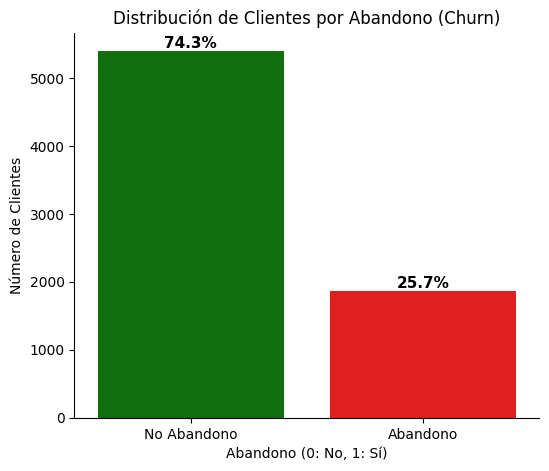


Distribución de clientes por Abandono:
Abandono
0    5398
1    1869
Name: count, dtype: int64

Proporción de clientes por Abandono:
Abandono
0    0.74281
1    0.25719
Name: count, dtype: float64


In [172]:
# distribución de la variable 'Abandono'
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar
# Definir colores: 0 (No Abandono) -> verde, 1 (Abandono) -> rojo
colors = {0: "green", 1: "red"}

plt.figure(figsize=(6, 5))
ax = sns.countplot(
    x="Abandono",
    data=datos_encoded,
    hue="Abandono",
    palette=colors,
    legend=False
)

plt.title("Distribución de Clientes por Abandono (Churn)")
plt.xlabel("Abandono (0: No, 1: Sí)")
plt.ylabel("Número de Clientes")
plt.xticks(ticks=[0, 1], labels=["No Abandono", "Abandono"])

# --- Agregar porcentajes sobre cada barra ---
total = len(datos_encoded)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f"{percentage:.1f}%",
                (p.get_x() + p.get_width() / 2., count),
                ha="center", va="bottom", fontsize=11, color="black", fontweight="bold")

# --- Quitar líneas superior y derecha ---
sns.despine(top=True, right=True)

plt.show()

# Calcular y mostrar la proporción de abandono
churn_counts = datos_encoded["Abandono"].value_counts()
churn_proportions = churn_counts / total

print("\nDistribución de clientes por Abandono:")
print(churn_counts)
print("\nProporción de clientes por Abandono:")
print(churn_proportions)

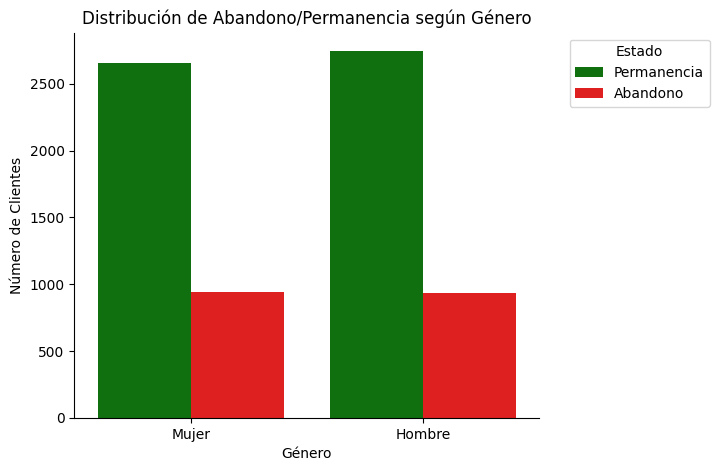

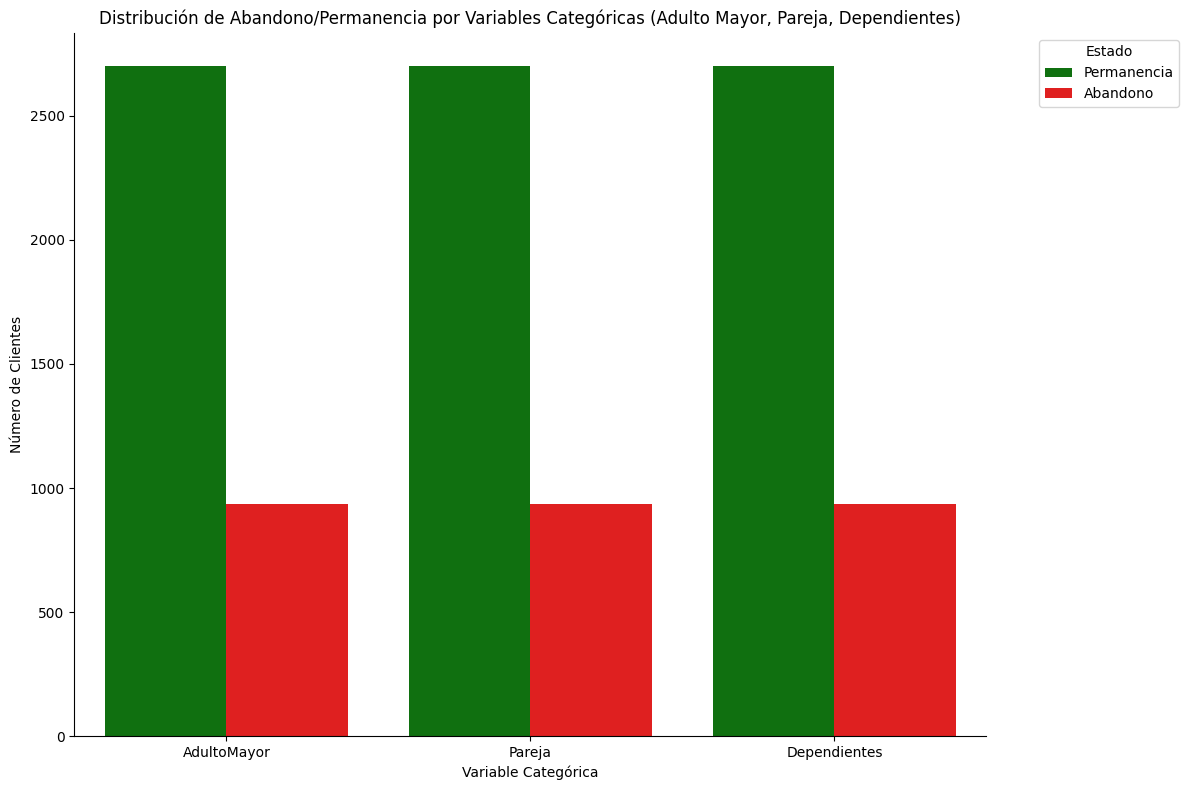

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables categóricas a graficar
categorical_vars_to_plot_group1 = ['Género']
categorical_vars_to_plot_group2 = ['AdultoMayor', 'Pareja', 'Dependientes']

# Mapeo de valores numéricos a nombres para las etiquetas del eje X
label_mapping = {
    'Género': {0: 'Mujer', 1: 'Hombre'},
    'AdultoMayor': {0: 'No Adulto Mayor', 1: 'Sí Adulto Mayor'},
    'Pareja': {0: 'Sin Pareja', 1: 'Con Pareja'},
    'Dependientes': {0: 'Sin Dependientes', 1: 'Con Dependientes'}
}

# Colores para Abandono (1) y Permanencia (0)
churn_colors = {'Permanencia': "green", 'Abandono': "red"} # 0: No Abandono (Permanencia), 1: Sí Abandono

# --- Generar el primer gráfico para Género ---
col = 'Género'
if col in datos_encoded.columns:
    plt.figure(figsize=(6, 5)) # Ajustar tamaño para un solo gráfico

    # Calcular las counts para Abandono y No Abandono por categoría de Género
    plot_data_gender = datos_encoded.groupby([col, 'Abandono'], observed=False).size().reset_index(name='count')

    # Mapear los valores numéricos de la columna 'Género' a sus nombres para el eje X
    if col in label_mapping:
        plot_data_gender[col] = plot_data_gender[col].map(label_mapping[col])

    # Mapear los valores numéricos de 'Abandono' a sus nombres para el hue y la leyenda
    plot_data_gender['Abandono_Label'] = plot_data_gender['Abandono'].map({0: 'Permanencia', 1: 'Abandono'})

    # Crear el gráfico de barras vertical agrupado para Género
    ax = sns.barplot(x=col, y='count', hue='Abandono_Label', data=plot_data_gender, palette=churn_colors, errorbar=None)

    plt.title("Distribución de Abandono/Permanencia según Género")
    plt.xlabel("Género") # Etiqueta del eje X
    plt.ylabel("Número de Clientes")

    # Ajustar la leyenda y moverla a la derecha
    plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')


    # Eliminar bordes superiores y derechos
    sns.despine(top=True, right=True)

    # Desactivar la cuadrícula explícitamente
    ax.grid(False)

    plt.show()
else:
    print(f"La columna '{col}' no se encontró en el DataFrame.")


# --- Generar el segundo gráfico para AdultoMayor, Pareja, Dependientes ---
all_plot_data_group2 = pd.DataFrame()
for col in categorical_vars_to_plot_group2:
    if col in datos_encoded.columns:
        # Calcular las counts para Abandono y No Abandono por categoría
        plot_data = datos_encoded.groupby([col, 'Abandono'], observed=False).size().reset_index(name='count')

        # Mapear los valores numéricos de la columna categórica a sus nombres
        if col in label_mapping:
            plot_data[col] = plot_data[col].map(label_mapping[col])

        # Mapear los valores numéricos de 'Abandono' a sus nombres
        plot_data['Abandono_Label'] = plot_data['Abandono'].map({0: 'Permanencia', 1: 'Abandono'})

        # Añadir una columna para identificar la variable original
        plot_data['Variable'] = col

        all_plot_data_group2 = pd.concat([all_plot_data_group2, plot_data])

    else:
        print(f"La columna '{col}' no se encontró en el DataFrame.")

# Crear el gráfico de barras vertical agrupado para el segundo grupo de variables
plt.figure(figsize=(12, 8)) # Ajustar tamaño
ax = sns.barplot(x='Variable', y='count', hue='Abandono_Label', data=all_plot_data_group2, palette=churn_colors, errorbar=None)

plt.title("Distribución de Abandono/Permanencia por Variables Categóricas (Adulto Mayor, Pareja, Dependientes)")
plt.xlabel("Variable Categórica")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=0) # Mantener etiquetas horizontales

# Mover la leyenda a la derecha fuera del gráfico
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar bordes superiores y derechos
sns.despine(top=True, right=True)

# Desactivar la cuadrícula explícitamente
ax.grid(False)

plt.tight_layout() # Ajustar layout
plt.show()

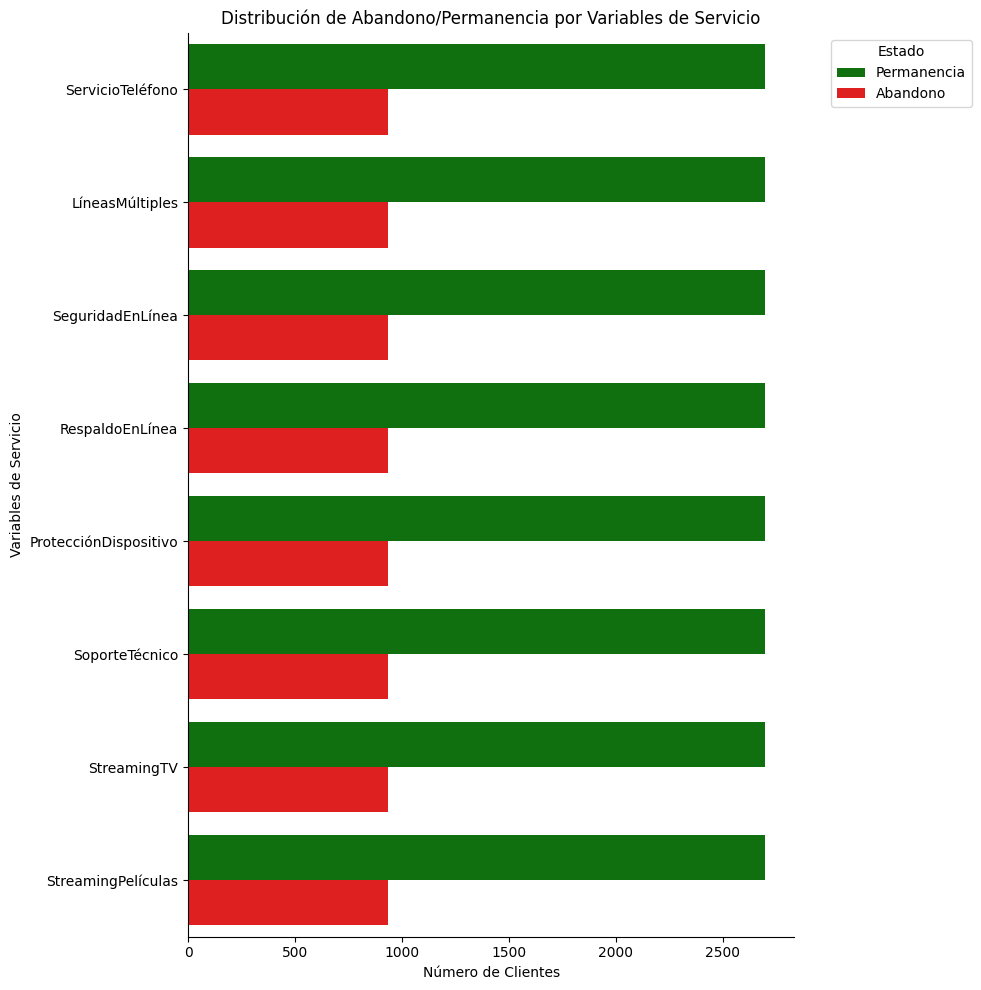

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables de servicio para graficar la distribución de abandono
service_vars_to_plot = [
    'ServicioTeléfono', 'LíneasMúltiples', 'SeguridadEnLínea',
    'RespaldoEnLínea', 'ProtecciónDispositivo', 'SoporteTécnico',
    'StreamingTV', 'StreamingPelículas'
]

# Mapeo de valores numéricos a nombres para el hue y la leyenda (0: Permanencia, 1: Abandono)
churn_label_mapping = {0: 'Permanencia', 1: 'Abandono'}

# Colores para Abandono y Permanencia
churn_colors = {'Permanencia': "green", 'Abandono': "red"}

# Preparar los datos para un gráfico agrupado horizontal
all_plot_data_service = pd.DataFrame()
for col in service_vars_to_plot:
    if col in datos_encoded.columns:
        # Calcular las counts para Abandono y No Abandono por categoría de servicio
        plot_data = datos_encoded.groupby([col, 'Abandono'], observed=False).size().reset_index(name='count')

        # Mapear los valores numéricos de 'Abandono' a sus nombres para el hue y la leyenda
        plot_data['Abandono_Label'] = plot_data['Abandono'].map(churn_label_mapping)

        # Añadir una columna para identificar la variable original
        plot_data['Variable'] = col

        all_plot_data_service = pd.concat([all_plot_data_service, plot_data])

    else:
        print(f"La columna '{col}' no se encontró en el DataFrame.")

# Crear el gráfico de barras horizontal agrupado
plt.figure(figsize=(10, 10)) # Ajustar tamaño del gráfico para acomodar más barras
ax = sns.barplot(x='count', y='Variable', hue='Abandono_Label', data=all_plot_data_service, palette=churn_colors, errorbar=None)

plt.title('Distribución de Abandono/Permanencia por Variables de Servicio')
plt.xlabel('Número de Clientes')
plt.ylabel('Variables de Servicio')

# Ajustar la leyenda (moverla a la derecha)
plt.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar bordes superiores y derechos
sns.despine(top=True, right=True)

# Desactivar la cuadrícula explícitamente
ax.grid(False)

plt.tight_layout() # Ajustar layout
plt.show()

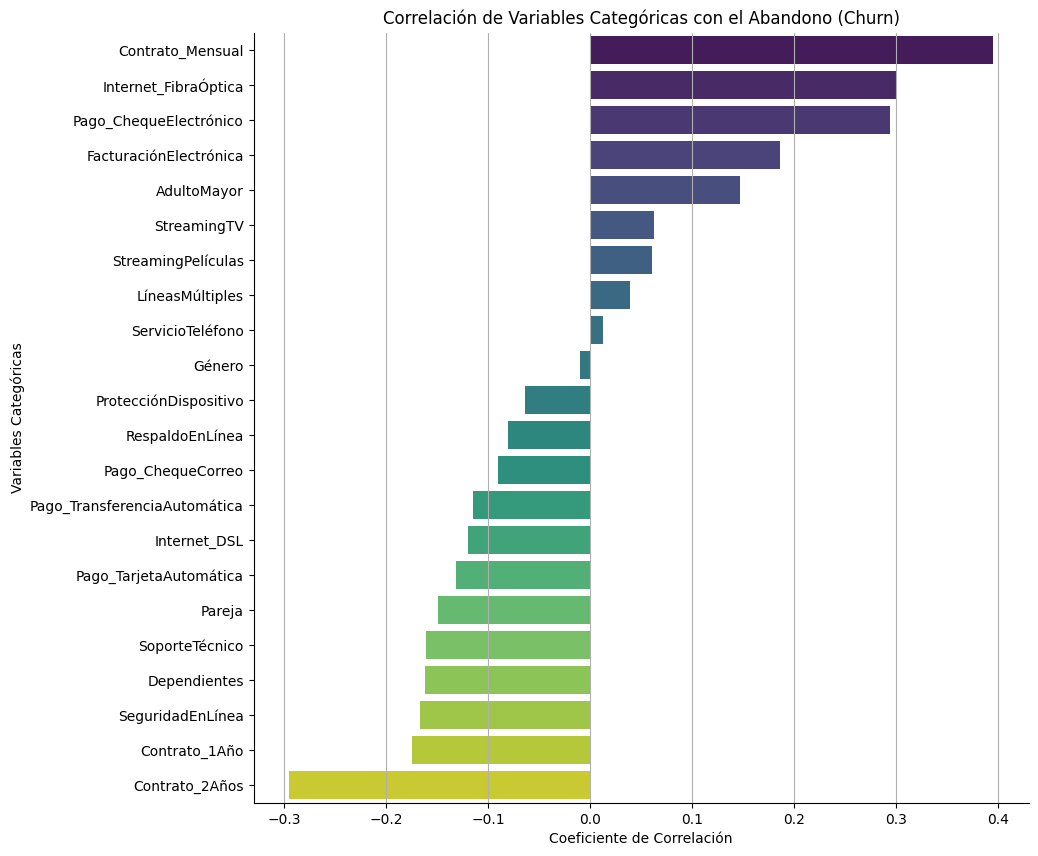

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de todas las variables categóricas (excluyendo 'Abandono')
all_categorical_vars = [
    'Género', 'AdultoMayor', 'Pareja', 'Dependientes',
    'ServicioTeléfono', 'LíneasMúltiples', 'SeguridadEnLínea',
    'RespaldoEnLínea', 'ProtecciónDispositivo', 'SoporteTécnico',
    'StreamingTV', 'StreamingPelículas', 'FacturaciónElectrónica',
    'Internet_DSL', 'Internet_FibraÓptica',
    'Contrato_Mensual', 'Contrato_1Año', 'Contrato_2Años',
    'Pago_TransferenciaAutomática', 'Pago_TarjetaAutomática',
    'Pago_ChequeElectrónico', 'Pago_ChequeCorreo'
]

# Asegurarnos de que 'Abandono' sea numérica para el cálculo de correlación
# Ya la mapeamos a 0 y 1, pero verificamos.
if datos_encoded['Abandono'].dtype.name == 'category':
     datos_encoded['Abandono'] = datos_encoded['Abandono'].astype(int)

# Calcular la correlación solo para las variables categóricas especificadas y Abandono
# Creamos un sub-DataFrame con estas columnas más Abandono
cols_to_correlate = all_categorical_vars + ['Abandono']

# Asegurarnos de que todas las columnas existan antes de seleccionarlas
cols_to_correlate = [col for col in cols_to_correlate if col in datos_encoded.columns]
correlation_df = datos_encoded[cols_to_correlate]


# Calcular la matriz de correlación para este sub-DataFrame
# Solo calculamos la correlación si hay más de una columna (Abandono + al menos una variable)
if len(correlation_df.columns) > 1:
    correlation_matrix = correlation_df.corr()

    # Extraer la correlación con la variable 'Abandono'
    correlation_with_churn = correlation_matrix['Abandono'].sort_values(ascending=False)

    # Excluir la correlación de 'Abandono' consigo misma
    correlation_with_churn = correlation_with_churn.drop('Abandono', errors='ignore') # Usar errors='ignore' por si Abandono ya fue excluido

    # Generar el gráfico de barras horizontales
    plt.figure(figsize=(10, 10)) # Ajustar tamaño del gráfico
    # Usamos la sugerencia anterior para evitar FutureWarning: asignar el eje y a hue y legend=False
    ax = sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, hue=correlation_with_churn.index, palette='viridis', legend=False)

    plt.title('Correlación de Variables Categóricas con el Abandono (Churn)')
    plt.xlabel('Coeficiente de Correlación')
    plt.ylabel('Variables Categóricas')
    plt.grid(axis='x') # Mantener las líneas de cuadrícula en el eje x para referencia
    sns.despine(top=True, right=True)
    plt.show()
else:
    print("No hay suficientes columnas categóricas para calcular la correlación con Abandono.")

# Analisis de variable numericas

Visualización de la distribución de Abandono/Permanencia con gráficos de columnas apiladas:


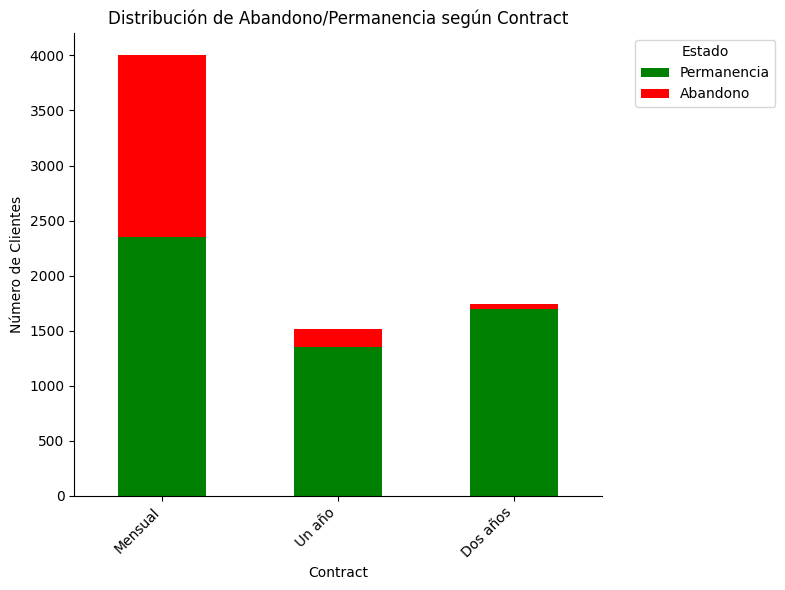

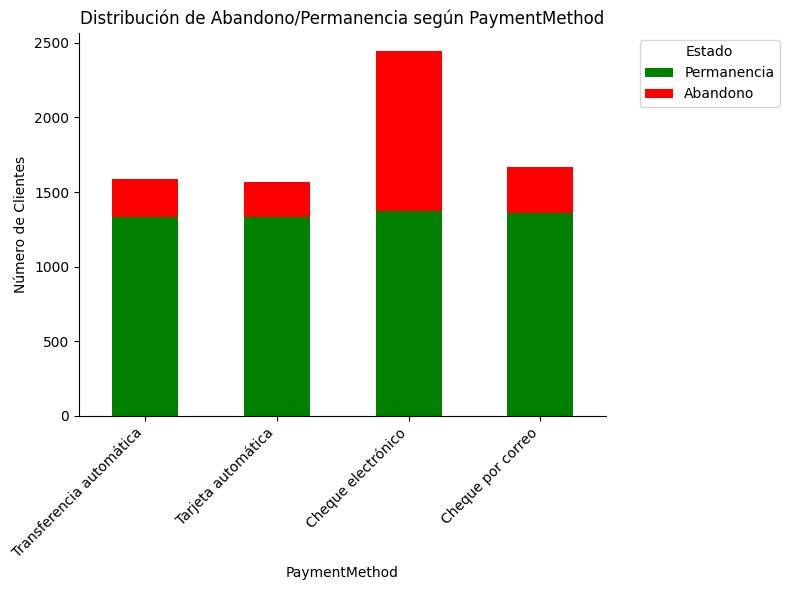

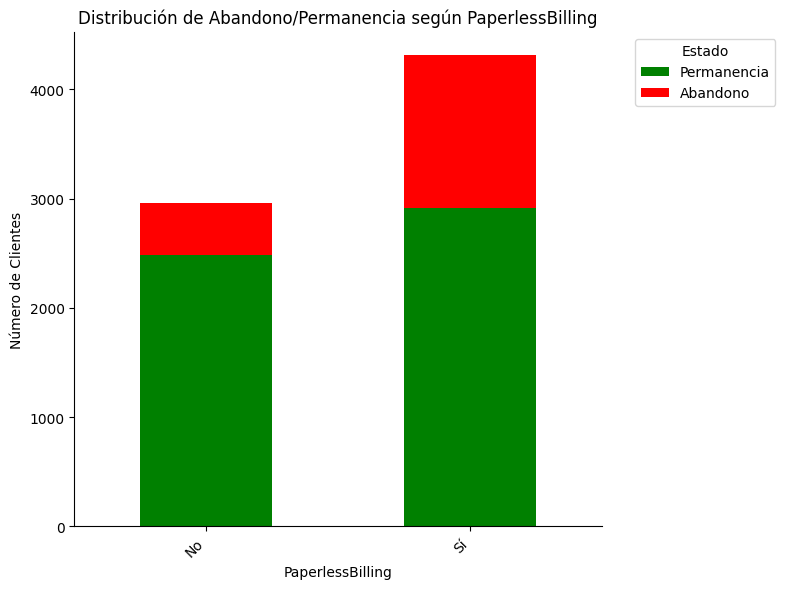

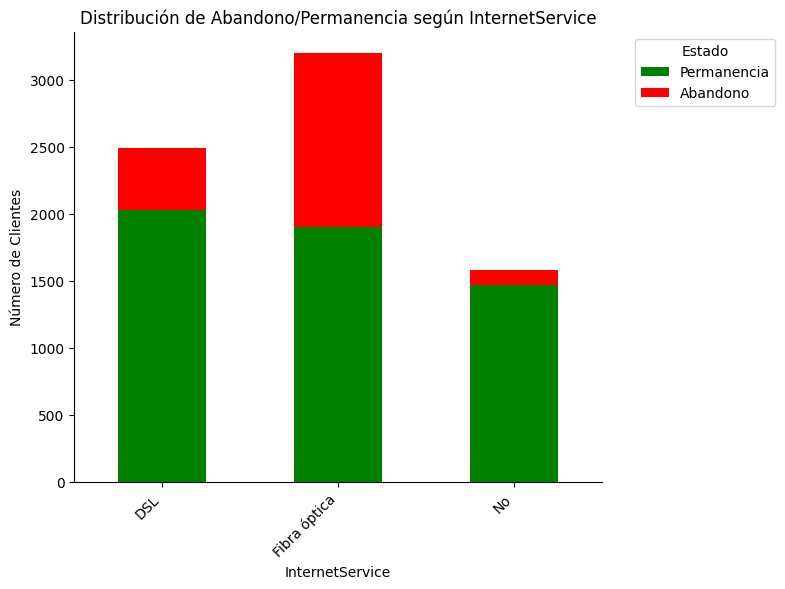

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables categóricas para graficar la distribución de abandono con barras apiladas
categorical_vars_stacked_plot = [
    'Contract', 'PaymentMethod', 'PaperlessBilling', 'InternetService'
]

# Mapeo de valores de Abandono a nombres para el hue y la leyenda
churn_label_mapping = {'No': 'Permanencia', 'Yes': 'Abandono'}

# Colores para Abandono y Permanencia
churn_colors = {'Permanencia': "green", 'Abandono': "red"}

# Mapeo de etiquetas del eje X de inglés a español para las variables específicas
label_translation = {
    'Contract': {
        'Month-to-month': 'Mensual',
        'One year': 'Un año',
        'Two year': 'Dos años'
    },
    'PaymentMethod': {
        'Electronic check': 'Cheque electrónico',
        'Mailed check': 'Cheque por correo',
        'Bank transfer (automatic)': 'Transferencia automática',
        'Credit card (automatic)': 'Tarjeta automática'
    },
    'PaperlessBilling': {
        'Yes': 'Sí',
        'No': 'No'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra óptica',
        'No': 'No'
    }
}


# Usaremos el DataFrame 'datos_cleaned' que aún tiene las columnas categóricas originales
# Asegurarnos de que 'Abandono' en datos_cleaned sea de tipo category o object
if datos_cleaned['Churn'].dtype.name != 'category' and datos_cleaned['Churn'].dtype.name != 'object':
     datos_cleaned['Churn'] = datos_encoded['Churn'].astype('category') # Usar datos_encoded ya que Abandono ya está mapeado a 0/1


print("Visualización de la distribución de Abandono/Permanencia con gráficos de columnas apiladas:")

for col in categorical_vars_stacked_plot:
    if col in datos_cleaned.columns:
        plt.figure(figsize=(8, 6)) # Ajustar tamaño del gráfico

        # Crear tabla de contingencia para el gráfico apilado
        # Usamos 'Churn' como índice y la variable categórica como columnas
        # Y luego transponemos para que las categorías de la variable queden en el eje X
        contingency_table = pd.crosstab(datos_cleaned[col], datos_cleaned['Churn'])

        # Crear el gráfico de barras apiladas
        # Usamos el método plot(kind='bar', stacked=True) de pandas en la tabla de contingencia transpuesta
        ax = contingency_table.plot(kind='bar', stacked=True, color=[churn_colors['Permanencia'], churn_colors['Abandono']], ax=plt.gca())


        plt.title(f"Distribución de Abandono/Permanencia según {col}")
        plt.xlabel(col)
        plt.ylabel("Número de Clientes")
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X si son largas

        # Aplicar traducción a las etiquetas del eje X si existe un mapeo para esta columna
        if col in label_translation:
            # Obtener las etiquetas originales del eje X
            original_labels = [item.get_text() for item in ax.get_xticklabels()]
            # Aplicar la traducción
            translated_labels = [label_translation[col].get(label, label) for label in original_labels]
            # Establecer las nuevas etiquetas traducidas
            ax.set_xticklabels(translated_labels)


        # Ajustar la leyenda (usar las etiquetas de texto)
        plt.legend(title="Estado", labels=[churn_label_mapping['No'], churn_label_mapping['Yes']], bbox_to_anchor=(1.05, 1), loc='upper left')


        # Eliminar bordes superiores y derechos
        sns.despine(top=True, right=True)

        # Desactivar la cuadrícula explícitamente
        ax.grid(False)

        plt.tight_layout() # Ajustar layout
        plt.show()

    else:
        print(f"\n--- Columna '{col}' no encontrada en el DataFrame 'datos_cleaned'. ---")

Visualización de la distribución de Variables Numéricas según el estado de Abandono:


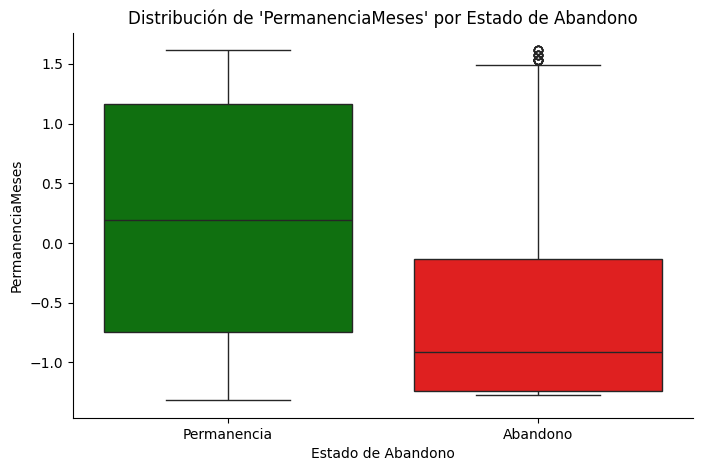

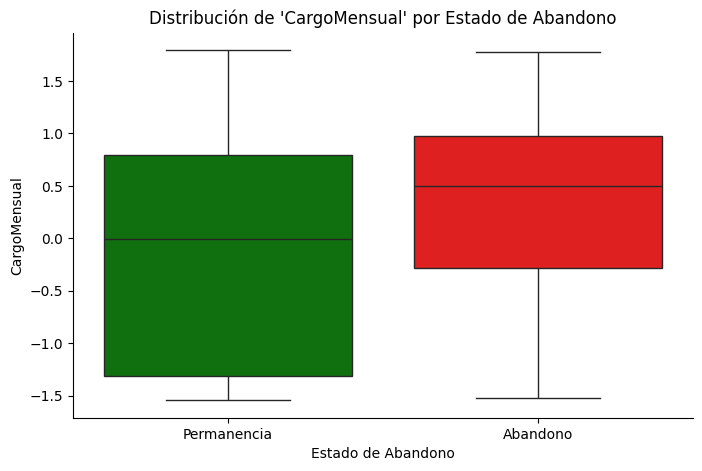

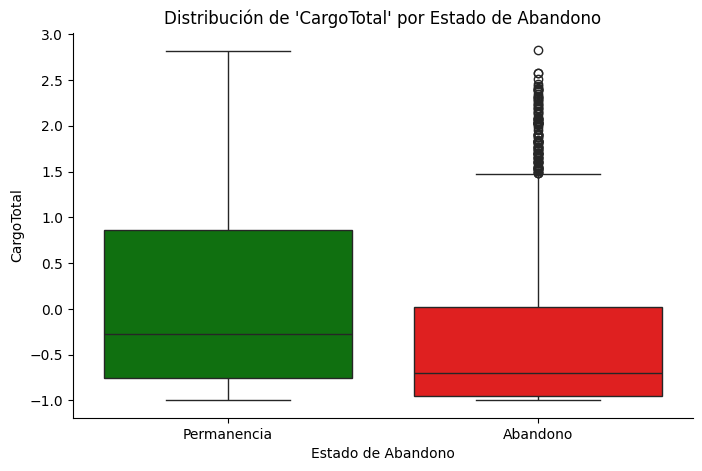

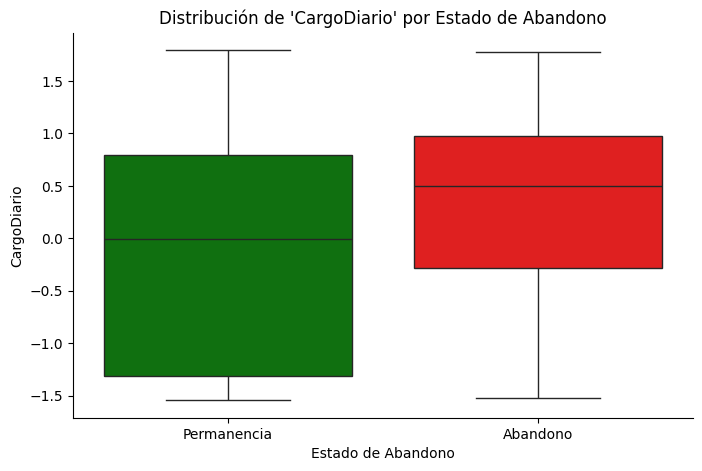

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas para visualizar
numeric_vars_to_plot = ['PermanenciaMeses', 'CargoMensual', 'CargoTotal', 'CargoDiario']

# Mapeo de valores numéricos de Abandono a nombres para el hue
churn_label_mapping = {0: 'Permanencia', 1: 'Abandono'}
# Asegurarnos de que la columna 'Abandono_Label' exista y esté actualizada
datos_encoded['Abandono_Label'] = datos_encoded['Abandono'].map(churn_label_mapping)

print("Visualización de la distribución de Variables Numéricas según el estado de Abandono:")

for col in numeric_vars_to_plot:
    if col in datos_encoded.columns:
        plt.figure(figsize=(8, 5))

        # Crear box plot
        # Usamos 'Abandono_Label' para el eje x y hue, y palette con las etiquetas de texto
        sns.boxplot(x='Abandono_Label', y=col, data=datos_encoded, hue='Abandono_Label', palette={'Permanencia': "green", 'Abandono': "red"}, legend=False)

        plt.title(f"Distribución de '{col}' por Estado de Abandono")
        plt.xlabel("Estado de Abandono")
        plt.ylabel(col)
        sns.despine(top=True, right=True)
        plt.show()

    else:
        print(f"\n--- Columna '{col}' no encontrada en el DataFrame. ---")

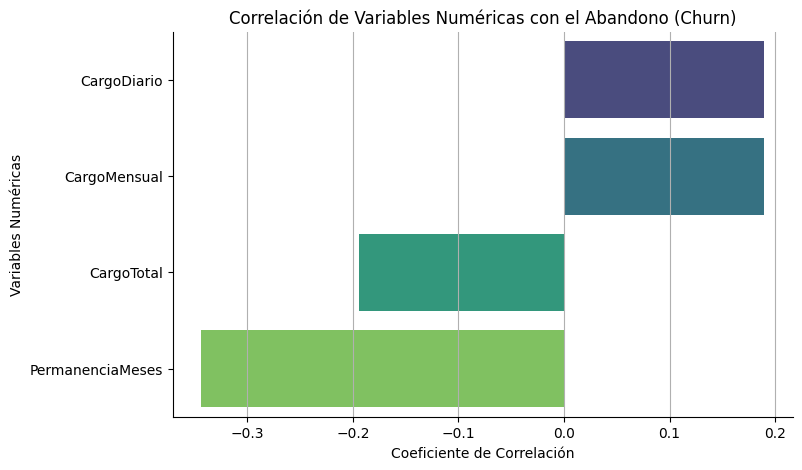

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables numéricas para calcular la correlación con Abandono
numeric_vars_for_correlation = ['PermanenciaMeses', 'CargoMensual', 'CargoTotal', 'CargoDiario']

# Asegurarnos de que 'Abandono' sea numérica para el cálculo de correlación
# Ya la mapeamos a 0 y 1 y la incluimos en numeric_df, pero verificamos.
if datos_encoded['Abandono'].dtype.name == 'category':
     datos_encoded['Abandono'] = datos_encoded['Abandono'].astype(int)

# Calcular la correlación solo para las variables numéricas especificadas y Abandono
# Creamos un sub-DataFrame con estas columnas más Abandono
cols_to_correlate = numeric_vars_for_correlation + ['Abandono']

# Asegurarnos de que todas las columnas existan antes de seleccionarlas
cols_to_correlate = [col for col in cols_to_correlate if col in datos_encoded.columns]
correlation_df_numeric = datos_encoded[cols_to_correlate]


# Calcular la matriz de correlación para este sub-DataFrame
# Solo calculamos la correlación si hay más de una columna (Abandono + al menos una variable)
if len(correlation_df_numeric.columns) > 1:
    correlation_matrix_numeric = correlation_df_numeric.corr()

    # Extraer la correlación con la variable 'Abandono'
    correlation_with_churn_numeric = correlation_matrix_numeric['Abandono'].sort_values(ascending=False)

    # Excluir la correlación de 'Abandono' consigo misma
    correlation_with_churn_numeric = correlation_with_churn_numeric.drop('Abandono', errors='ignore') # Usar errors='ignore' por si Abandono ya fue excluido

    # Generar el gráfico de barras horizontales
    plt.figure(figsize=(8, 5)) # Ajustar tamaño del gráfico
    # Usamos la sugerencia anterior para evitar FutureWarning: asignar el eje y a hue y legend=False
    ax = sns.barplot(x=correlation_with_churn_numeric.values, y=correlation_with_churn_numeric.index, hue=correlation_with_churn_numeric.index, palette='viridis', legend=False)

    plt.title('Correlación de Variables Numéricas con el Abandono (Churn)')
    plt.xlabel('Coeficiente de Correlación')
    plt.ylabel('Variables Numéricas')
    plt.grid(axis='x') # Mantener las líneas de cuadrícula en el eje x para referencia
    sns.despine(top=True, right=True)
    plt.show()
else:
    print("No hay suficientes columnas numéricas para calcular la correlación con Abandono.")

In [176]:
print(datos_encoded.columns.tolist())

['Abandono', 'Género', 'AdultoMayor', 'Pareja', 'Dependientes', 'PermanenciaMeses', 'ServicioTeléfono', 'LíneasMúltiples', 'SeguridadEnLínea', 'RespaldoEnLínea', 'ProtecciónDispositivo', 'SoporteTécnico', 'StreamingTV', 'StreamingPelículas', 'FacturaciónElectrónica', 'CargoMensual', 'CargoTotal', 'Internet_DSL', 'Internet_FibraÓptica', 'Contrato_Mensual', 'Contrato_1Año', 'Contrato_2Años', 'Pago_TransferenciaAutomática', 'Pago_TarjetaAutomática', 'Pago_ChequeElectrónico', 'Pago_ChequeCorreo', 'CargoDiario']


#📄Informe final

Ahora que los datos han sido limpiados y preparados, los siguientes pasos podrían incluir:

1.  **Selección de Características**: Identificar las características más relevantes para predecir el abandono.
2.  **División de Datos**: Dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
3.  **Selección y Entrenamiento del Modelo**: Elegir y entrenar un modelo de clasificación para predecir el abandono.
4.  **Evaluación del Modelo**: Evaluar el rendimiento del modelo utilizando métricas apropiadas.
5.  **Afinación del Modelo**: Optimizar los hiperparámetros del modelo para mejorar su rendimiento.
6.  **Interpretación del Modelo**: Comprender qué características son más importantes para la predicción de abandono.
7.  **Informe Final**: Presentar los hallazgos y las conclusiones.

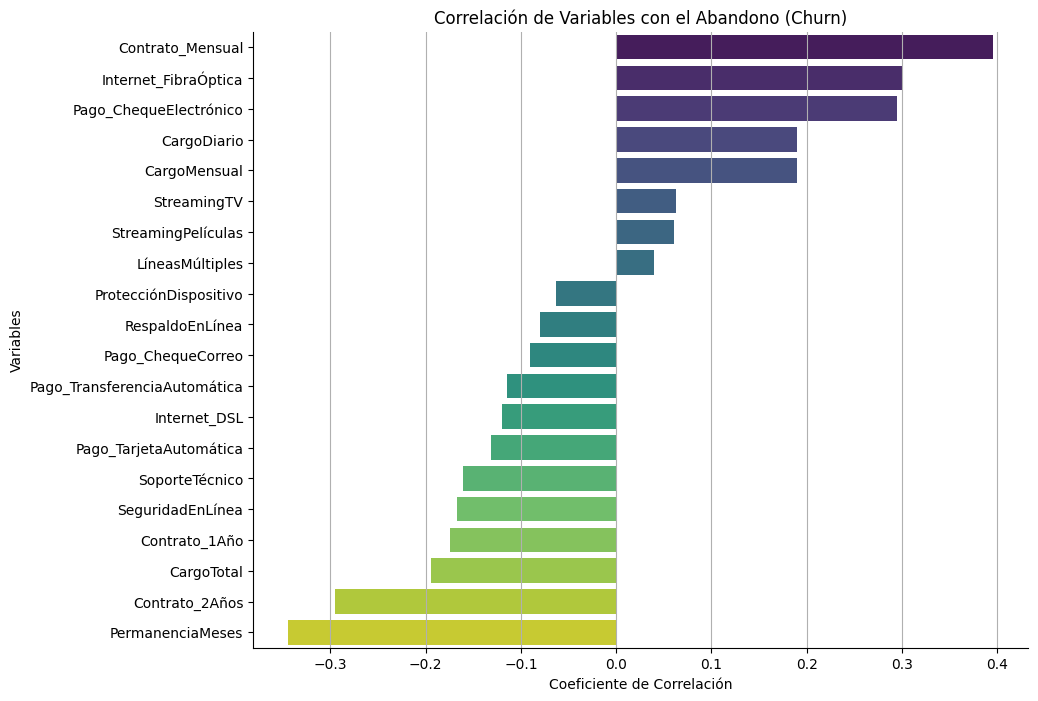

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación. Es importante excluir columnas no numéricas si las hubiera.
# Aunque ya hemos codificado la mayoría, 'Género', 'AdultoMayor', etc. son ahora numéricas (0/1).
# Aseguramos que todas las columnas a correlacionar sean numéricas.
# Excluimos 'customerID' si aún estuviera presente (ya la eliminamos antes).
# La columna 'Abandono' ya está mapeada a 0 y 1, lo cual es adecuado para la correlación.

# Seleccionar solo columnas numéricas para calcular la correlación
numeric_df = datos_encoded.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación con la variable 'Abandono'
# Asegurarnos de que 'Abandono' esté presente y sea numérica en numeric_df
if 'Abandono' in datos_encoded.columns:
    if datos_encoded['Abandono'].dtype.name == 'category':
         # Convertir 'Abandono' a numérica si aún es category (aunque ya lo hicimos antes, mejor ser seguro)
         numeric_df['Abandono'] = datos_encoded['Abandono'].astype(int)
    elif datos_encoded['Abandono'].dtype in ['int64', 'float64']:
         # Si ya es numérica, simplemente incluirla
         numeric_df['Abandono'] = datos_encoded['Abandono']

# Recalcular la correlación con la columna 'Abandono' en el dataframe numérico
if 'Abandono' in numeric_df.columns:
    correlation_with_churn = numeric_df.corr()['Abandono'].sort_values(ascending=False)

    # Excluir la correlación de 'Abandono' consigo misma (será 1)
    correlation_with_churn = correlation_with_churn.drop('Abandono')

    # Generar el gráfico de barras horizontales
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, hue=correlation_with_churn.index, palette='viridis', legend=False)
    plt.title('Correlación de Variables con el Abandono (Churn)')
    plt.xlabel('Coeficiente de Correlación')
    plt.ylabel('Variables')
    plt.grid(axis='x')
    sns.despine(top=True, right=True)
    plt.show()
else:
    print("La columna 'Abandono' no se encontró en el DataFrame numérico para calcular la correlación.")

Visualización de la distribución de Abandono/Permanencia con gráficos de columnas apiladas:


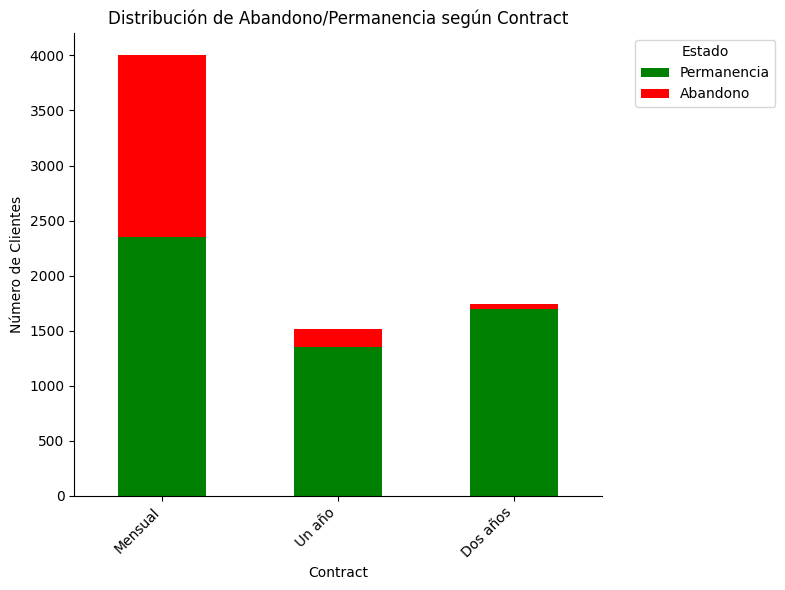

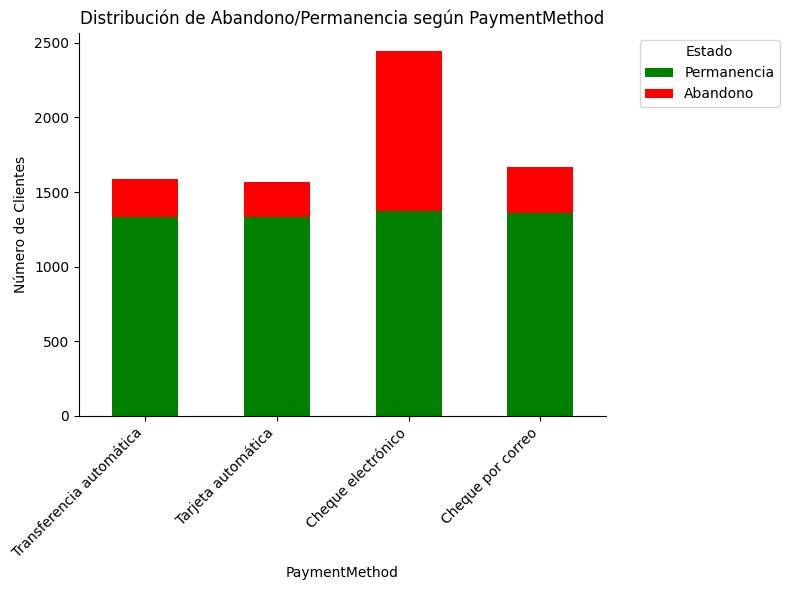

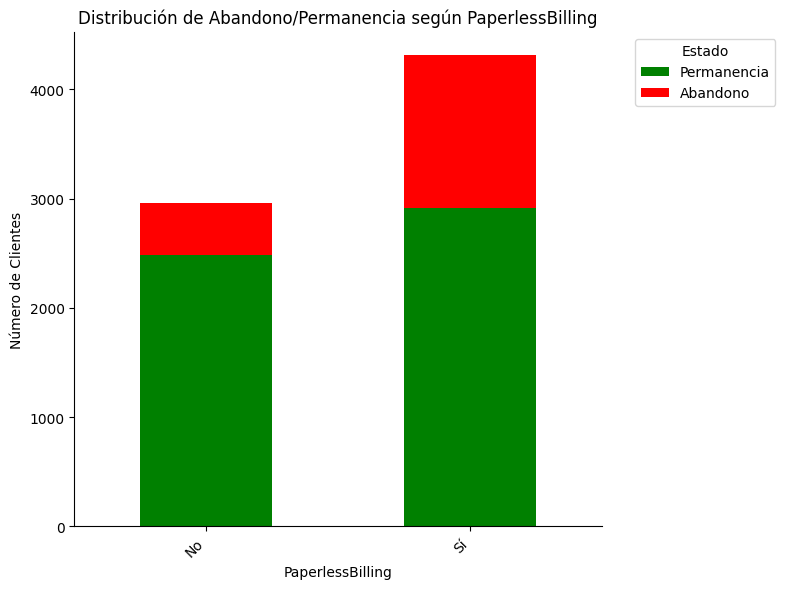

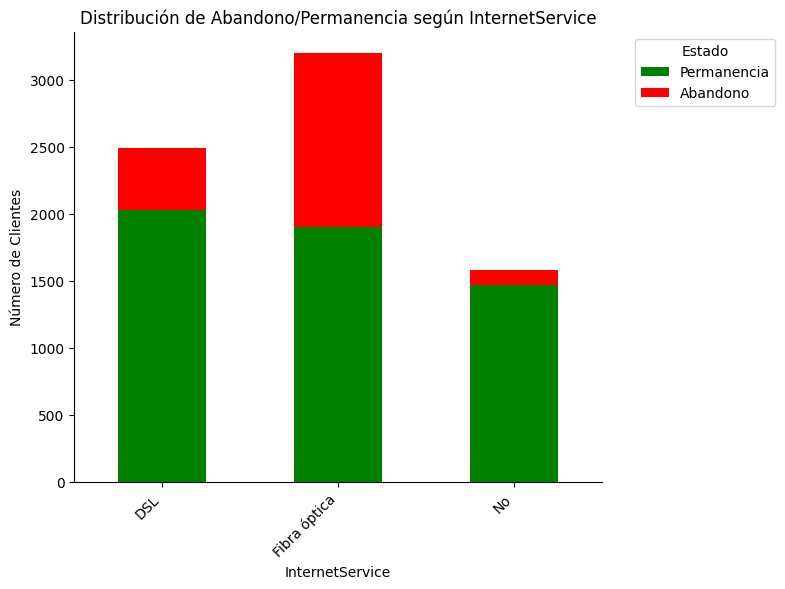

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lista de variables categóricas para graficar la distribución de abandono con barras apiladas
categorical_vars_stacked_plot = [
    'Contract', 'PaymentMethod', 'PaperlessBilling', 'InternetService'
]

# Mapeo de valores de Abandono a nombres para el hue y la leyenda
churn_label_mapping = {'No': 'Permanencia', 'Yes': 'Abandono'}

# Colores para Abandono y Permanencia
churn_colors = {'Permanencia': "green", 'Abandono': "red"}

# Mapeo de etiquetas del eje X de inglés a español para las variables específicas
label_translation = {
    'Contract': {
        'Month-to-month': 'Mensual',
        'One year': 'Un año',
        'Two year': 'Dos años'
    },
    'PaymentMethod': {
        'Electronic check': 'Cheque electrónico',
        'Mailed check': 'Cheque por correo',
        'Bank transfer (automatic)': 'Transferencia automática',
        'Credit card (automatic)': 'Tarjeta automática'
    },
    'PaperlessBilling': {
        'Yes': 'Sí',
        'No': 'No'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra óptica',
        'No': 'No'
    }
}


# Usaremos el DataFrame 'datos_cleaned' que aún tiene las columnas categóricas originales
# Asegurarnos de que 'Abandono' en datos_cleaned sea de tipo category o object
if datos_cleaned['Churn'].dtype.name != 'category' and datos_cleaned['Churn'].dtype.name != 'object':
     datos_cleaned['Churn'] = datos_encoded['Churn'].astype('category') # Usar datos_encoded ya que Abandono ya está mapeado a 0/1


print("Visualización de la distribución de Abandono/Permanencia con gráficos de columnas apiladas:")

for col in categorical_vars_stacked_plot:
    if col in datos_cleaned.columns:
        plt.figure(figsize=(8, 6)) # Ajustar tamaño del gráfico

        # Crear tabla de contingencia para el gráfico apilado
        # Usamos 'Churn' como índice y la variable categórica como columnas
        # Y luego transponemos para que las categorías de la variable queden en el eje X
        contingency_table = pd.crosstab(datos_cleaned[col], datos_cleaned['Churn'])

        # Crear el gráfico de barras apiladas
        # Usamos el método plot(kind='bar', stacked=True) de pandas en la tabla de contingencia transpuesta
        ax = contingency_table.plot(kind='bar', stacked=True, color=[churn_colors['Permanencia'], churn_colors['Abandono']], ax=plt.gca())


        plt.title(f"Distribución de Abandono/Permanencia según {col}")
        plt.xlabel(col)
        plt.ylabel("Número de Clientes")
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X si son largas

        # Aplicar traducción a las etiquetas del eje X si existe un mapeo para esta columna
        if col in label_translation:
            # Obtener las etiquetas originales del eje X
            original_labels = [item.get_text() for item in ax.get_xticklabels()]
            # Aplicar la traducción
            translated_labels = [label_translation[col].get(label, label) for label in original_labels]
            # Establecer las nuevas etiquetas traducidas
            ax.set_xticklabels(translated_labels)


        # Ajustar la leyenda (usar las etiquetas de texto)
        plt.legend(title="Estado", labels=[churn_label_mapping['No'], churn_label_mapping['Yes']], bbox_to_anchor=(1.05, 1), loc='upper left')


        # Eliminar bordes superiores y derechos
        sns.despine(top=True, right=True)

        # Desactivar la cuadrícula explícitamente
        ax.grid(False)

        plt.tight_layout() # Ajustar layout
        plt.show()

    else:
        print(f"\n--- Columna '{col}' no encontrada en el DataFrame 'datos_cleaned'. ---")

In [221]:
# Guardar el DataFrame modificado como un archivo CSV
datos_encoded.to_csv('datos_telecom_modificado.csv', index=False)

# 📄 Informe de Análisis de Abandono de Clientes (Churn)

## 🔹 Introducción

Este ejercio se realiza como parte de la formacion Data Science de Alura Latam - Aprendiendo a hacer ETL

Se realiza análisis exploratorio de datos (EDA) sobre el conjunto de datos de clientes de TelecomX con el objetivo de comprender el problema de la evasión de clientes (Churn). El abandono de clientes es un desafío crítico para las empresas de telecomunicaciones, ya que retener a los clientes existentes suele ser más rentable que adquirir nuevos. Comprender los factores que influyen en la decisión de un cliente de abandonar el servicio es fundamental para desarrollar estrategias de retención efectivas.

El análisis se centra en identificar patrones y relaciones entre las características de los clientes, los servicios que utilizan y su comportamiento de abandono, utilizando métodos de análisis estadístico y visualizaciones.

## 🔹 Limpieza y Tratamiento de Datos

Los datos se cargaron inicialmente desde un archivo JSON. Durante la etapa de limpieza y tratamiento, se realizaron los siguientes pasos clave:

*   **Normalización de Datos Anidados**: Las columnas `customer`, `phone`, `internet` y `account`, que contenían estructuras JSON anidadas, se normalizaron y se expandieron en columnas separadas para facilitar el análisis.
*   **Combinación de DataFrames**: Las columnas normalizadas se combinaron con las columnas `customerID` y `Churn` originales para formar un DataFrame consolidado (`datos_normalized`).
*   **Manejo de Valores Faltantes**: Se verificó la presencia de valores faltantes. Se identificaron 11 valores faltantes en la columna `CargoTotal`, los cuales fueron imputados utilizando la mediana de la columna para evitar la pérdida de datos importantes.
*   **Verificación de Duplicados**: Se comprobó la existencia de filas duplicadas, no encontrándose ninguna.
*   **Verificación de Inconsistencias Categóricas**: Se revisaron los valores únicos en las columnas categóricas para identificar posibles inconsistencias. Se mapearon valores como 'No phone service' y 'No internet service' a 0 junto con 'No', y 'Yes' a 1 para una codificación binaria consistente.
*   **Conversión de Tipos de Datos**: Las columnas de cargos (`Charges_Monthly` y `Charges_Total`) se convirtieron a tipo numérico (`float64`), manejando posibles errores. Las columnas categóricas se convirtieron al tipo `category`.
*   **Codificación de Variables Categóricas**: Se aplicó one-hot encoding a las columnas 'InternetService', 'Contract' y 'PaymentMethod' para convertirlas en variables numéricas binarias. Las columnas categóricas binarias restantes (mapeadas a 0 y 1) se mantuvieron como tipo `int64` o `category` según la etapa del análisis lo requirió, asegurando la correcta interpretación para visualizaciones y correlaciones. La columna objetivo 'Abandono' también se mapeó a 0 (No) y 1 (Sí) para análisis cuantitativos.
*   **Creación de Nueva Característica**: Se creó la columna `CargoDiario` dividiendo `CargoMensual` por 30.
*   **Normalización de Variables Numéricas**: Las variables numéricas clave (`PermanenciaMeses`, `CargoMensual`, `CargoTotal`, `CargoDiario`) se normalizaron utilizando `StandardScaler` para escalar los datos a una media de 0 y desviación estándar de 1, lo cual es útil para ciertos análisis y modelos.
*   **Eliminación de Columnas No Significativas**: Se eliminaron columnas como `customerID` (identificador único no útil para el modelado general) y `InternetService_No` (redundante después del one-hot encoding de InternetService).

El resultado de esta etapa es un DataFrame (`datos_encoded`) limpio, preprocesado y listo para el análisis exploratorio.

## 🔹 Análisis Exploratorio de Datos

Se realizaron varios análisis visuales y estadísticos para explorar las características de los clientes y su relación con el abandono:

*   **Distribución General del Abandono**: Se visualizó la proporción total de clientes que abandonaron (aproximadamente **25.7%**) frente a los que permanecieron (aproximadamente **74.3%**), mostrando un desbalance en la variable objetivo.
*   **Análisis de Variables Categóricas y Abandono**:
    *   Se generaron gráficos de barras (agrupadas y apiladas) mostrando la distribución de abandono y permanencia para diversas variables categóricas como Género, AdultoMayor, Pareja, Dependientes, Variables de Servicio (ServicioTeléfono, LíneasMúltiples, SeguridadEnLínea, etc.), Tipo de Contrato, Método de Pago, Facturación Electrónica y Tipo de Servicio de Internet.
    *   Estos gráficos revelaron patrones interesantes:
        *   Los clientes con **contratos mes a mes** tienen una tasa de abandono significativamente mayor en comparación con aquellos con contratos de uno o dos años.
        *   Los clientes que utilizan **Cheque electrónico** como método de pago muestran una mayor proporción de abandono.
        *   Los clientes con **Facturación Electrónica** también parecen tener una mayor tasa de abandono.
        *   Los clientes con **servicio de Fibra Óptica** presentan una tasa de abandono considerablemente más alta que los que tienen DSL o no tienen servicio de internet.
        *   Variables como **SeguridadEnLínea**, **RespaldoEnLínea**, **ProtecciónDispositivo** y **SoporteTécnico** muestran que los clientes que *no* tienen estos servicios tienden a abandonar más.
        *   Variables como **Género** no mostraron diferencias visuales marcadas en la distribución del abandono.
*   **Correlación de Variables Categóricas con Abandono**: Se calculó y visualizó la correlación de Pearson entre las variables categóricas codificadas (0/1) y la variable Abandono (0/1). Esto confirmó visualmente las asociaciones observadas en los gráficos de distribución:
    *   Variables como `Contrato_Mensual`, `Internet_FibraÓptica` y `Pago_ChequeElectrónico` mostraron correlaciones positivas relativamente fuertes con el abandono.
    *   Variables como `Contrato_2Años`, `PermanenciaMeses` (aunque numérica, su correlación se visualizó junto a categóricas codificadas en un gráfico anterior) y `Dependientes` mostraron correlaciones negativas.
*   **Análisis de Variables Numéricas y Abandono**:
    *   Se generaron box plots para visualizar la distribución de 'PermanenciaMeses', 'CargoMensual', 'CargoTotal' y 'CargoDiario' para los grupos de clientes que abandonaron y los que no.
    *   Estos gráficos mostraron que los clientes que abandonan tienden a tener:
        *   Menor **Permanencia en meses**.
        *   Mayor **CargoMensual** (en promedio).
        *   Menor **CargoTotal** (lo cual es coherente con una menor permanencia).
    *   Se calculó y visualizó la correlación de Pearson entre estas variables numéricas y el abandono, confirmando que `PermanenciaMeses` y `CargoTotal` tienen correlaciones negativas notables, mientras que `CargoMensual` y `CargoDiario` tienen correlaciones positivas más débiles.
*   **Pruebas Estadísticas de Asociación**: Se realizaron pruebas de Chi-cuadrado para algunas variables categóricas ('Género', 'AdultoMayor', 'Pareja', 'Dependientes') y la variable Abandono. Los resultados (valores p muy bajos para 'AdultoMayor', 'Pareja' y 'Dependientes') confirmaron que existe una asociación estadísticamente significativa entre estas variables y el abandono, mientras que para 'Género' no se encontró una asociación significativa.

## 🔹 Conclusiones e Insights

Basado en el análisis exploratorio, podemos extraer los siguientes insights clave sobre los factores que influyen en el abandono de clientes:

*   **Contrato**: Los clientes con contratos mes a mes son significativamente más propensos a abandonar que aquellos con contratos a largo plazo (uno o dos años). La duración del contrato es un fuerte predictor de abandono.
*   **Servicio de Internet**: Los clientes con servicio de Fibra Óptica tienen una tasa de abandono notablemente mayor que otros. Esto podría indicar problemas con la calidad del servicio de fibra o expectativas no cumplidas.
*   **Servicios Adicionales**: La falta de servicios de seguridad en línea, respaldo en línea, protección de dispositivo y soporte técnico está asociada con un mayor abandono. Los clientes que utilizan estos servicios adicionales tienden a permanecer.
*   **Método de Pago**: El uso de Cheque electrónico se relaciona con una mayor tasa de abandono, mientras que los métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) se asocian con una menor tasa de abandono.
*   **Facturación Electrónica**: Los clientes que optan por la facturación electrónica parecen tener una mayor propensión al abandono.
*   **Permanencia y Cargos**: Los clientes que abandonan suelen ser clientes más nuevos (menor permanencia) y, por lo tanto, tienen un Cargo Total más bajo. Sin embargo, sus cargos mensuales tienden a ser más altos que los de los clientes a largo plazo que permanecen. Esto sugiere que los clientes con altos cargos mensuales y poca permanencia son de alto riesgo.
*   **Demografía**: Ser un adulto mayor, tener pareja o dependientes parece estar asociado con una menor propensión al abandono (aunque la asociación con AdultoMayor y Pareja es más fuerte que con Dependientes según las pruebas de Chi-cuadrado). El género no mostró una asociación significativa con el abandono.

En resumen, los clientes de alto riesgo de abandono tienden a ser aquellos con contratos mes a mes, servicio de Fibra Óptica, que no utilizan servicios adicionales de seguridad/soporte, pagan con cheque electrónico, usan facturación electrónica, tienen poca antigüedad y cargos mensuales altos.

## 🔹 Recomendaciones

Basado en los hallazgos del análisis, se sugieren las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

1.  **Incentivar Contratos a Largo Plazo**: Ofrecer descuentos o beneficios atractivos para que los clientes de mes a mes cambien a contratos de uno o dos años.
2.  **Mejorar la Experiencia del Cliente de Fibra Óptica**: Investigar las causas del alto abandono entre los usuarios de fibra óptica (problemas técnicos, calidad del servicio, expectativas vs. realidad) y tomar medidas correctivas. Considerar programas de retención específicos para este segmento.
3.  **Promocionar Servicios de Valor Añadido**: Educar a los clientes sobre los beneficios de la seguridad en línea, respaldo, protección de dispositivo y soporte técnico. Ofrecer paquetes promocionales o pruebas gratuitas para fomentar su adopción, especialmente para clientes de alto riesgo.
4.  **Optimizar Métodos de Pago**: Incentivar el uso de métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) a través de pequeños descuentos o facilidad de configuración, y quizás investigar por qué el pago con cheque electrónico se asocia a mayor abandono.
5.  **Revisar la Estrategia de Facturación Electrónica**: Analizar si la facturación electrónica en sí misma es un factor o si está correlacionada con otros factores de abandono. Si es un factor directo, revisar el proceso o comunicación asociada.
6.  **Programas de Retención Temprana**: Implementar programas de contacto y ofertas especiales para clientes con baja antigüedad (poca permanencia) y cargos mensuales altos, ya que son un segmento de alto riesgo identificado.
7.  **Segmentación de Clientes**: Utilizar estos hallazgos para segmentar a los clientes en grupos de alto y bajo riesgo de abandono y dirigir las campañas de retención de manera más efectiva.
8.  **Monitoreo Continuo**: Establecer un sistema de monitoreo continuo de los indicadores clave identificados (tipo de contrato, servicio de internet, uso de servicios adicionales, método de pago, permanencia, cargos) para detectar clientes en riesgo de abandono de manera proactiva.

Este análisis exploratorio proporciona una base sólida para comprender el abandono de clientes en TelecomX. Los siguientes pasos podrían incluir la construcción de un modelo predictivo de churn (aunque el usuario solicitó no usar ML en esta etapa, es una aplicación común de este análisis) para identificar clientes individuales en riesgo con mayor precisión y medir la efectividad de las estrategias de retención implementadas.

In [220]:
# Guardar el DataFrame modificado como un archivo CSV
datos_encoded.to_csv('datos_telecom_modificado.csv', index=False)